# End to End Data Analysis, Time Series forecasting, Statistics and Machine Learning Projects and cheat sheets

Will be updating i every day

#### usa.gov data

anonymous data gathered from users who shorten links ending with .gov or .mil from a partneship between the us government and bit.ly

In [205]:
#Data comes in json format, we'll convert it to a python dict first

path = 'data/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [206]:
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [207]:
# Let's extract the time zones for each link and store them in a list
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:15]
#We can see that there is some empty data

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong']

In [208]:
# To count the occurence of each of the timezones and finding the most frequent one
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [209]:
counts = get_counts(time_zones)
counts['America/Chicago']

400

In [210]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [211]:
# A better way
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [212]:
#Using pandas instead of standard Python
import pandas as pd
import numpy as np

df = pd.DataFrame(records)
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [213]:
tz_counts = df['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [214]:
clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

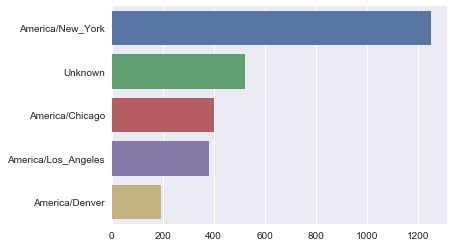

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

subset = tz_counts[:5]
sns.barplot( y = subset.index, x = subset.values);

In [216]:
# The 'a' field contains info about the device used to perform the url shortening
df['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [217]:
df['a'][1]

'GoogleMaps/RochesterNY'

In [218]:
results = pd.Series([x.split()[0] for x in df.a.dropna()])
results[:7]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
dtype: object

In [219]:
#The five most used devices
results.value_counts()[:5]

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

In [220]:
# Decompose data into mozilla and non mozilla users
cf = df[df.a.notnull()]

cf['os'] = np.where(cf['a'].str.contains('Mozilla'), 'Mozilla',  'Not Mozilla')
cf['os'][:5]

C:\Users\khalil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0        Mozilla
1    Not Mozilla
2        Mozilla
3        Mozilla
4        Mozilla
Name: os, dtype: object

In [221]:
by_tz_os = cf.groupby(['tz', 'os']).size().unstack().fillna(0)
by_tz_os[:10]

os,Mozilla,Not Mozilla
tz,,
,480.0,41.0
Africa/Cairo,3.0,0.0
Africa/Casablanca,1.0,0.0
Africa/Ceuta,2.0,0.0
Africa/Johannesburg,1.0,0.0
Africa/Lusaka,1.0,0.0
America/Anchorage,5.0,0.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,1.0,0.0


### MovieLens 1M Dataset

GroupLens Research (http://www.grouplens.org/node/73) provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender identification, and occupation).

In [222]:
# Make display smaller
pd.options.display.max_rows = 10

In [223]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/movielens/users.dat', sep='::',
                      header=None, names=unames)

C:\Users\khalil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [224]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)

C:\Users\khalil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

C:\Users\khalil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [226]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [227]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [228]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [229]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [230]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [231]:
data[data.user_id == 1].head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1725,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2250,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
2886,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4201,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [232]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [233]:
#Let's look at the mean movie ratings
mean_ratings = data.pivot_table('rating', index = 'title',
                                columns = 'gender', aggfunc = 'mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [234]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [235]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

In [236]:
#Now we reduced our data quite so much but we kept the relevent informations only
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [237]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [238]:
# Measuring rating disagreement between males and females
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [239]:
# Reverse order of rows
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [240]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

In [241]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [242]:
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### 2012 Federal Election Commission Database

The US Federal Election Commission publishes data on contributions to political campaigns. This includes contributor names, occupation and employer, address, and contribution amount. An interesting dataset is from the 2012 US presidential election (http://www.fec.gov/disclosurep/PDownload.do). As of this writing (June 2012), the full dataset for all states is a 150 megabyte CSV file P00000001-ALL.csv, which can be loaded with pandas.read_csv:

In [243]:
fec = pd.read_csv('data/fec/P00000001-ALL.csv')
fec.info()

C:\Users\khalil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [244]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [245]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [246]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [247]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [248]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [249]:
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [250]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [251]:
fec = fec[fec.contb_receipt_amt > 0]

In [252]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [253]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [254]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [255]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [256]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


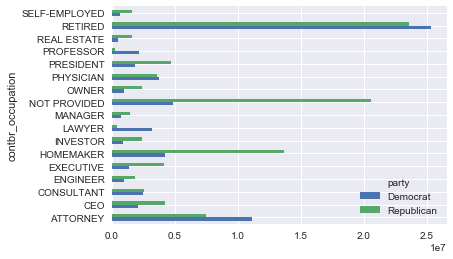

In [257]:
over_2mm.plot(kind='barh')

# Python visualization review and cheat sheet

In [258]:
import matplotlib.pyplot as plt

In [259]:
# The standard plot method
x = np.linspace(0, 3, 6)
x

array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [260]:
y = power(x, 2)
y

array([ 0.  ,  0.36,  1.44,  3.24,  5.76,  9.  ])

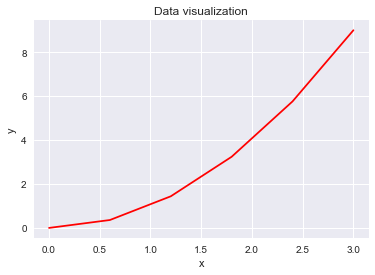

In [261]:
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data visualization');

##### Line properties

The default line format when we plot data in matplotlib is a solid blue line, which is abbreviated as b-, to change the setting we only need to add the symbol code, which includes letters as color string and symbols as line style string

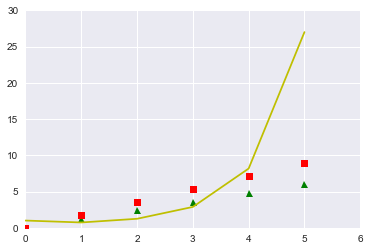

In [262]:
#Different lines we different formats
plt.plot(x*2, 'g^', x*3, 'rs', x**x, 'y-')
plt.axis([0, 6, 0, 30]);

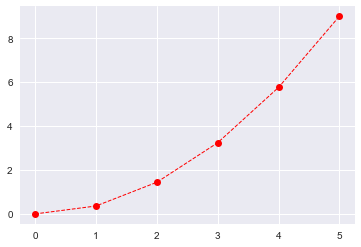

In [263]:
#some line properties
line = plt.plot(y, color='red', linewidth = 1.0, linestyle = '--')
plt.setp(line, marker = 'o');

#### Figure and subplots:

By default all plotting commands apply to the current figure and axes, in some situations, wa want to visualize data in multiple figures and axes to compare different plots or to use the space on a page more efficiently.

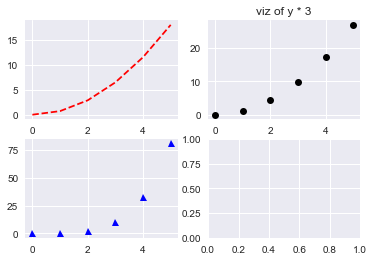

In [264]:
#define a fig 'a'
plt.figure('a')
plt.subplot(221) #the first position of 4 subplots in 2*2 figure
plt.plot(y + y, 'r--')

plt.subplot(222)
plt.plot(y * 3, 'ko')

plt.subplot(223)
plt.plot(y * y, 'b^')

plt.subplot(224);

# We can modify any subplot in figure 'a'
plt.figure('a')
plt.subplot(222)
plt.title('viz of y * 3');

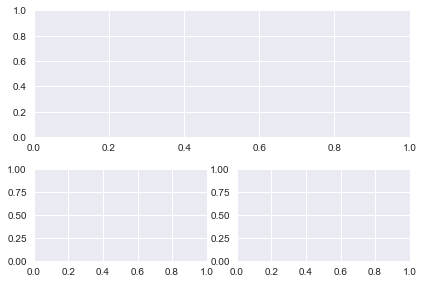

In [265]:
# we can define the size of each plot using
# plt.axes([left, bottom, width, height])
plt.figure('b')
ax1 = plt.axes([0.05, 0.1, 0.4, 0.32])
ax2 = plt.axes([0.52, 0.1, 0.4, 0.32])
ax3 = plt.axes([0.05, 0.53, 0.87, 0.44])

Different plot types

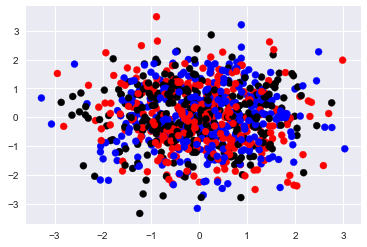

In [266]:
#Scatter plot: relationship between vars in the same dataset
X = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
plt.scatter(X, y, c = ['b', 'k', 'r']);

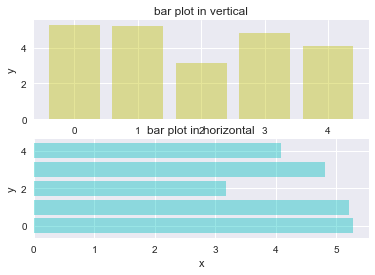

In [267]:
# Bar plot: representing grouped data
X = np.arange(5)
Y = 3.14 + 2.71 * np.random.rand(5)
plt.subplots(2)

# the first subplot
plt.subplot(211)
plt.bar(X, Y, align='center', alpha=0.4, color='y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('bar plot in vertical')

# the second subplot
plt.subplot(212)
plt.barh(X, Y, align='center', alpha=0.4, color='c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('bar plot in horizontal');

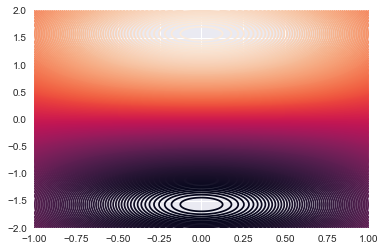

In [268]:
#Contour plots: relationship between three numeric vars in two dimensions
x = np.linspace(-1, 1, 255)
y = np.linspace(-2, 2, 300)
z = np.sin(y[:, np.newaxis]) * np.cos(x)

plt.contour(x, y, z, 255, linewidth = 1);

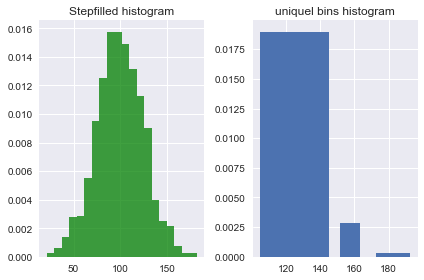

In [269]:
#Histogram: distibution of numerical data graphically
mu, sigma = 100, 25
fig, (ax0, ax1) = plt.subplots(ncols=2)
x = mu + sigma * np.random.randn(1000)

ax0.hist(x,20, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('Stepfilled histogram')
ax1.hist(x, bins=[100,150, 165, 170, 195], normed=1, histtype='bar', rwidth=0.8)
ax1.set_title('uniquel bins histogram')

# automatically adjust subplot parameters to give specified padding
plt.tight_layout()

#### Legends and annotations

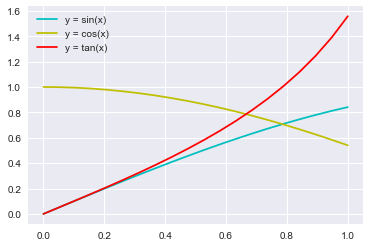

In [270]:
x = np.linspace(0, 1, 20) 
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

plt.plot(x, y1, 'c', label='y = sin(x)')
plt.plot(x, y2, 'y', label='y = cos(x)')
plt.plot(x, y3, 'r', label='y = tan(x)')
plt.legend(loc='upper left');

The loc argument in the legend command is used to figure out the position of the label box. There are several valid location options: lower left, right, upper left, lower center, upper right, center, lower right, upper right, center right, best, upper center, and center left. The default position setting is upper right. However, when we set an invalid location option that does not exist in the above list, the function automatically falls back to the best option.

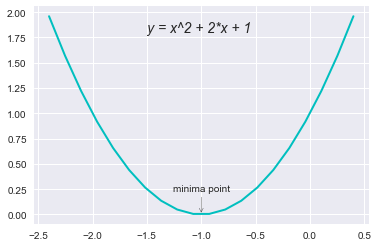

In [271]:
#Annotations
x = np.linspace(-2.4, 0.4, 20)
y = x*x + 2*x + 1
plt.plot(x, y, 'c', linewidth=2.0)

plt.text(-1.5, 1.8, 'y = x^2 + 2*x + 1',
             fontsize=14, style='italic')

plt.annotate('minima point', xy=(-1, 0),
                 xytext=(-1, 0.3),
                 horizontalalignment='center', 
                 verticalalignment='top', 
                 arrowprops=dict(arrowstyle='->',    
                 connectionstyle='arc3'));

# Time Series

In [284]:
#Reminder of basic timeseries functionalities
import datetime
datetime.datetime(2000, 1, 1)

datetime.datetime(2000, 1, 1, 0, 0)

In [285]:
datetime.datetime.strptime("2000/1/1", "%Y/%m/%d")

datetime.datetime(2000, 1, 1, 0, 0)

In [286]:
datetime.datetime(2000, 1, 1, 0, 0).strftime("%Y%m%d")

'20000101'

In [287]:
pd.to_datetime("13.01.2000")

Timestamp('2000-01-13 00:00:00')

In [288]:
pd.to_datetime("7/8/2000")

Timestamp('2000-07-08 00:00:00')

In [289]:
pd.to_datetime("7/8/2000", dayfirst=True)

Timestamp('2000-08-07 00:00:00')

In [290]:
ts = pd.to_datetime(946684800000000000)
ts.year, ts.month, ts.day, ts.weekday()

(2000, 1, 1, 5)

In [291]:
index = [pd.Timestamp("2000-01-01"),
             pd.Timestamp("2000-01-02"),
             pd.Timestamp("2000-01-03")]
ts = pd.Series(np.random.randn(len(index)), index=index)
ts

2000-01-01    0.709634
2000-01-02    0.244815
2000-01-03    1.377298
dtype: float64

In [293]:
ts = pd.Series(np.random.randn(len(index)), index=[
              "2000-01-01", "2000-01-02", "2000-01-03"])
ts.index

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object')

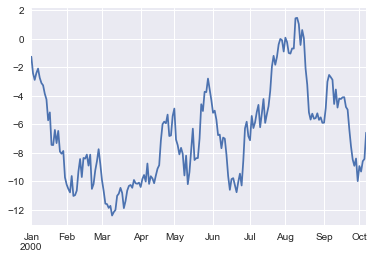

In [295]:
index = pd.date_range(start='2000-01-01', periods=200, freq='B')
ts = pd.Series(np.random.randn(len(index)), index=index)

walk = ts.cumsum()
walk.plot();

In [296]:
ts.head()

2000-01-03   -1.264485
2000-01-04   -1.159634
2000-01-05   -0.466326
2000-01-06    0.479455
2000-01-07    0.313494
Freq: B, dtype: float64

In [297]:
ts['2000-01-03']

-1.264485196988564

In [298]:
ts['2000-01-03':datetime.datetime(2000, 1, 5)]

2000-01-03   -1.264485
2000-01-04   -1.159634
2000-01-05   -0.466326
Freq: B, dtype: float64

In [299]:
ts['2000-02']

2000-02-01   -0.500283
2000-02-02   -0.307906
2000-02-03   -0.242290
2000-02-04    1.150473
2000-02-07   -1.403116
                ...   
2000-02-23    0.344114
2000-02-24    0.952026
2000-02-25    0.643209
2000-02-28    0.847500
2000-02-29   -1.033050
Freq: B, Length: 21, dtype: float64

In [300]:
ts['2000-03':'2000-05'].head()

2000-03-01   -1.143207
2000-03-02   -0.752178
2000-03-03   -0.895137
2000-03-06   -0.030974
2000-03-07   -0.266459
Freq: B, dtype: float64

In [301]:
small_ts = ts['2000-02-01':'2000-02-05'].copy()
small_ts

2000-02-01   -0.500283
2000-02-02   -0.307906
2000-02-03   -0.242290
2000-02-04    1.150473
Freq: B, dtype: float64

In [302]:
#Shifting forward
small_ts.shift(2)

2000-02-01         NaN
2000-02-02         NaN
2000-02-03   -0.500283
2000-02-04   -0.307906
Freq: B, dtype: float64

In [394]:
small_ts.shift(-2)

2000-02-01   -0.242290
2000-02-02    1.150473
2000-02-03         NaN
2000-02-04         NaN
Freq: B, dtype: float64

# Tensorflow Neural Nets

In [1]:
#basics of tensorflow
import tensorflow as tf

In [6]:
x1 = tf.constant(5)
x2 = tf.constant(6)

result = tf.multiply(x1, x2)
print(result)

Tensor("Mul_1:0", shape=(), dtype=int32)


In [10]:
# the result is an int32 Tensor, to see the result we should run a session
sess = tf.Session()
print(sess.run(result))
#Now we get the result,  the difference between this and native python is speed
sess.close()

30


In [14]:
#we can do it like this so it will close automatically once finished
with tf.Session() as sess:
    output = sess.run(result)
    print(sess.run(result))

30


In [16]:
#We saved our result in another one so we ca access it outside of the session
print(output)

30


In [18]:
#Creating a deep neural net with Tensorflow
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_dataata

In [27]:
mnist = input_data.read_data_sets('/tmp/data', one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [43]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 1000

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

In [44]:
def neural_network_model(data):
    
    hidden_1_layer = {'weights': tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
    hidden_2_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
    hidden_3_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                      'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    #(input data * weights) + biases
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    output = tf.matmul(l3, output_layer['weights']) + output_layer['biases']
    
    return output

In [45]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits = prediction,
                                                                  labels = y) )
    
    #default learning rate is 0.001
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 20
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(hm_epochs):
            epoch_loss = 0
            
            for _ in range(int(mnist.train.num_examples / batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
                epoch_loss += c
                
            print('Epoch: ', epoch, ' completed out of ',
                  hm_epochs, ' loss: ', epoch_loss)
            
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy: ',
              accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

In [46]:
train_neural_network(x)

Epoch:  0  completed out of  20  loss:  2555796.31064
Epoch:  1  completed out of  20  loss:  581918.704567
Epoch:  2  completed out of  20  loss:  306786.513418
Epoch:  3  completed out of  20  loss:  182677.502357
Epoch:  4  completed out of  20  loss:  112725.667777
Epoch:  5  completed out of  20  loss:  77234.5589353
Epoch:  6  completed out of  20  loss:  48774.9263716
Epoch:  7  completed out of  20  loss:  42705.7006029
Epoch:  8  completed out of  20  loss:  41254.5862363
Epoch:  9  completed out of  20  loss:  32296.7090611
Epoch:  10  completed out of  20  loss:  30983.4838866
Epoch:  11  completed out of  20  loss:  34731.3553678
Epoch:  12  completed out of  20  loss:  29020.528687
Epoch:  13  completed out of  20  loss:  26257.8967044
Epoch:  14  completed out of  20  loss:  25874.8804697
Epoch:  15  completed out of  20  loss:  24245.9078238
Epoch:  16  completed out of  20  loss:  19484.5179613
Epoch:  17  completed out of  20  loss:  16968.4317034
Epoch:  18  completed

# Supervised Learning

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [13]:
#creating a fake dataset
import mglearn
X, y = mglearn.datasets.make_forge()

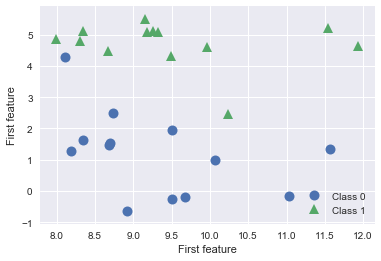

In [16]:
#plot dataset for a classification problem
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc = 4)
plt.xlabel("First feature")
plt.ylabel("First feature");

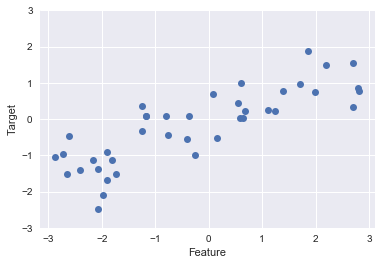

In [21]:
#plot dataset for a regression problem
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target");

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [24]:
#this dataset consists of 569 data points with 30 features each
cancer.data.shape

(569, 30)

In [27]:
#from these 569, 212 are labeled malignant and 357 benign
{n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'benign': 357, 'malignant': 212}

In [31]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

### K-nearest Neighbors

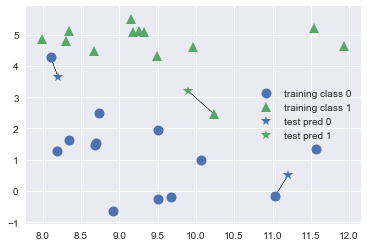

In [41]:
# A simple 1neighbor knn classification
mglearn.plots.plot_knn_classification(n_neighbors = 1);

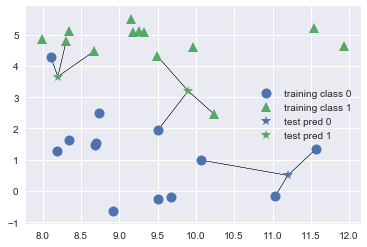

In [42]:
#Three new datapoints were added each one of these was assigned to the color
#of the colsest point to it
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [43]:
#We can see that the results did change for the first attempt when we increased the
#number of neighbors each point should have close before a class is being assigned to it
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [54]:
clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [55]:
#Let's evaluate the accuracy of out model
clf.score(X_test, y_test)

0.8571428571428571

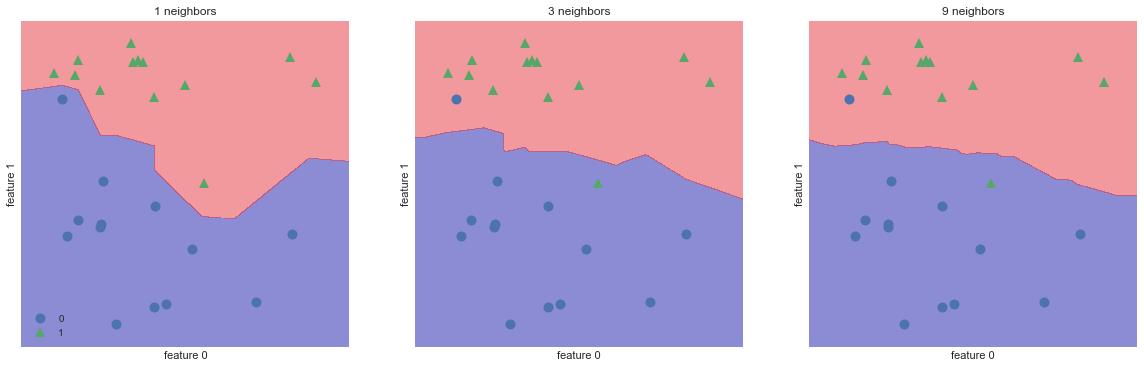

In [61]:
#our model achieved an accuracy of 86%, now let's plot

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

for n_neighbor, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbor).fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill = True,
                                    eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    
    ax.set_title('{} neighbors'.format(n_neighbor))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
axes[0].legend(loc = 3);

In [62]:
#Let's try on a real dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                   random_state = 66)

In [63]:
training_accuracy = []
test_accuracy = []

#try with neighbors from 1, to 10
neighbors_settings = range(1, 11)

In [65]:
for n_neighbor in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbor)
    clf.fit(X_train, y_train)
    
    #record the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

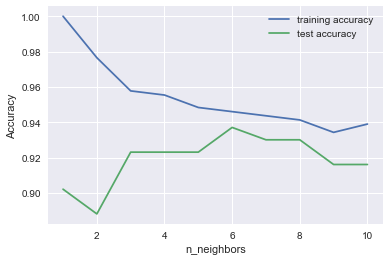

In [66]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")

plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend();

When only one neighbor is set the prediction in the trainig set is perfect, that's overfitting. The best model is around 6 neighbors where test an training accuracy are close to each others, and even if accuracy drops it still is around 94%


### K-neighbors regression

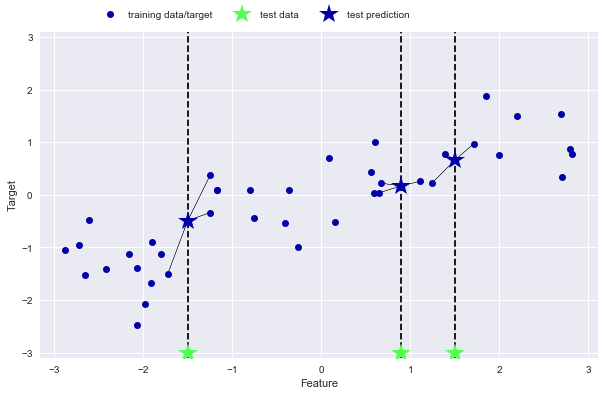

In [67]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [69]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [70]:
reg.score(X_test, y_test)

0.83441724462496036

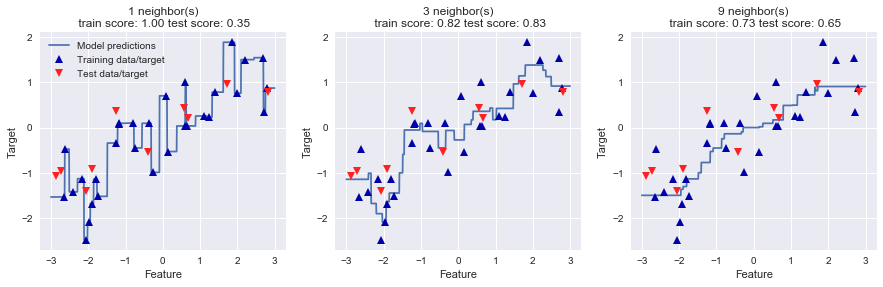

In [79]:
#The R squared gives us some quite good results

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best");

We can see that 3 is a better fit that 9 neighbors, and also better than 1 neighbor

In principle, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data (see Chapter 3). This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features. The method we discuss next has neither of these drawbacks.